# Working with complicated dataset

Your name: Michael Huh

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [41]:
### Your code here . . .
import pandas as pd

my_columns = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]

blast_results = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'
blast_data = pd.read_csv(blast_results, na_values=['-'], skiprows=7, names=my_columns, usecols=my_columns)
blast_data.drop(columns=['query acc.ver'], inplace=True)
blast_data.set_index('subject acc.ver', inplace=True)
blast_data.info()
blast_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % identity        100 non-null    float64
 1   alignment length  100 non-null    int64  
 2   mismatches        100 non-null    int64  
 3   gap opens         100 non-null    int64  
 4   q. start          100 non-null    int64  
 5   q. end            100 non-null    int64  
 6   s. start          100 non-null    int64  
 7   s. end            100 non-null    int64  
 8   evalue            100 non-null    int64  
 9   bit score         100 non-null    int64  
 10  % positives       100 non-null    float64
 11  bonds             100 non-null    object 
 12  publications      97 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 10.9+ KB


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


### Question 2
What is the average number of publications?

In [39]:
### Your code here . . .
blast_data['publications'] = pd.to_numeric(blast_data['publications'], errors='coerce')

average_publications = blast_data['publications'].dropna().mean()

print(f"Average Publications (excluding NaN values): {average_publications}")

Average Publications (excluding NaN values): 26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [40]:
### Your code here . . .
blast_data['bonds'] = pd.to_numeric(blast_data['bonds'].str.replace(',', '', regex=True), errors='coerce').fillna(0).astype(int)

high_bond_subjects = blast_data[blast_data['bonds'] > 15000].index

high_bond_subjects_list = high_bond_subjects.tolist()

for subject in high_bond_subjects_list:
  print(f"- {subject}")

- AGK29621.1
- AHG32084.1
- 6G2J_H
- YP_002791042.1
- AGK29634.1
- 0806162F
- YP_009112408.1
- YP_001876469.1
- YP_009092269.1
- AHG32149.1
- YP_009092074.1
- YP_009450474.1
- YP_004123270.1
- YP_009092073.1
- AHZ60901.1
- YP_004123350.1
- YP_009453754.1
- ADD46492.1
- YP_007025968.1
- YP_009453806.1
- YP_007024956.1
- ASM92364.1
- YP_006073044.1
- ASM92494.1
- ADG95699.1
- YP_004891275.1
- YP_009166014.1
- YP_009538416.1
- YP_009414182.1
- YP_009178854.1
- YP_009414415.1
- YP_009353908.1
- YP_009093743.1
- ABX45285.1
- YP_009414156.1
- YP_009414363.1


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

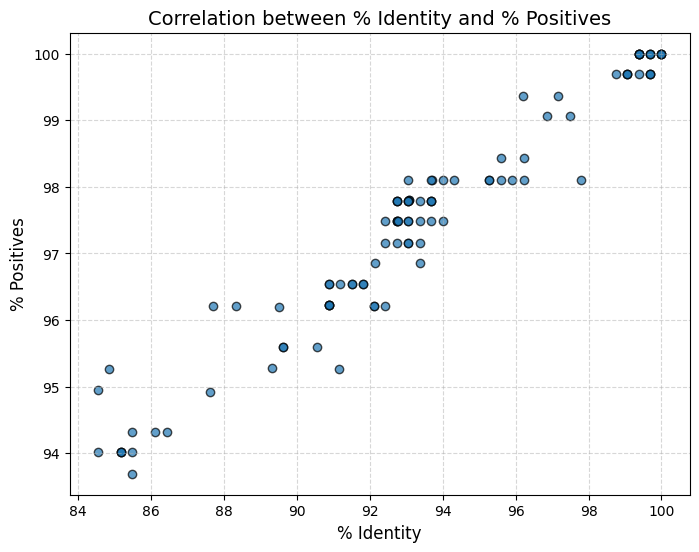

In [42]:
### Your code here . . .
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(blast_data['% identity'], blast_data['% positives'], alpha=0.7, edgecolor='k')
plt.title('Correlation between % Identity and % Positives', fontsize=14)
plt.xlabel('% Identity', fontsize=12)
plt.ylabel('% Positives', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [55]:
### Your code here . . .

my_columns = ["subject acc.ver", "Protein source"]
protein_source_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv'
protein_source_data = pd.read_csv(protein_source_url, skiprows=1, names=my_columns)

merged = blast_data.merge(protein_source_data, left_on='subject acc.ver', right_on='subject acc.ver', how='left')
merged.set_index('subject acc.ver', inplace=True)
merged['Protein source'] = merged['Protein source'].fillna('NA')

merged.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0,NA
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0,NA
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0,NA
